<a href="https://colab.research.google.com/github/dopplerchase/Leinonen_Python_Forward_Model/blob/master/Foward_Model_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward Modeling Z from a PSD (SNOW)

Here is an example of calculating Z at common microwave wavelengths from a measured PSD. 

First up, download the repository. It has the code, sample data to play with and Leinonen and Szyrmer (2015)'s results. 

In [1]:
!git clone https://github.com/dopplerchase/Leinonen_Python_Forward_Model.git

Cloning into 'Leinonen_Python_Forward_Model'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 33 (delta 9), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (33/33), done.


Install netCDF4 to read the sample PSD in and pytmatrix for coefs in the calc

In [19]:
!pip install netCDF4
!pip install pytmatrix

# comment out if you dont want my style plots 
!pip install git+https://github.com/dopplerchase/DRpy.git
import drpy

  Cloning https://github.com/dopplerchase/DRpy.git to /tmp/pip-req-build-3pajtsht
  Running command git clone -q https://github.com/dopplerchase/DRpy.git /tmp/pip-req-build-3pajtsht
  Created wheel for DRpy: filename=DRpy-0.0.0-cp36-none-any.whl size=49344 sha256=7cd9b22be396420b0b09fa9168c55eede5afeb5a29eda7b55f47b3c8f4ec873c
  Stored in directory: /tmp/pip-ephem-wheel-cache-gy468c69/wheels/38/6d/b7/910e8e07b5b2348384992db25ecb85a0a60d51b873db4cf749
Successfully built DRpy


import packages 

In [3]:
import netCDF4 
import xarray as xr 
import scipy.interpolate
import pandas as pd 
import os 

#change dir 
os.chdir('/content/Leinonen_Python_Forward_Model/')

from forward import *

%pylab inline 




Populating the interactive namespace from numpy and matplotlib


In [4]:
psd = xr.open_dataarray('./SAMPLE_OLYMPEX.nc')
psd

<xarray.DataArray (n_sample: 2000, D_bin: 41)>
array([[       0.      ,        0.      ,        0.      , ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [30738672.269088,        0.      ,        0.      , ...,
               0.      ,        0.      ,        0.      ],
       [       0.      , 62776142.268432,  9493922.750473, ...,
               0.      ,        0.      ,        0.      ],
       [       0.      ,        0.      ,        0.      , ...,
               0.      ,        0.      ,        0.      ]])
Coordinates:
    time     (n_sample) datetime64[ns] ...
    D        (D_bin) float64 ...
    dD       (D_bin) float64 ...
Dimensions without coordinates: n_sample, D_bin
Attributes:
    units:          m^-4
    standard_name:  Sample N(D) from OLYMPEX 01 Dec 2015. 5-s averages. D is ...

In [25]:
#initialize class
Z = forward_Z()
#git the class the PSD
Z.set_PSD(PSD = np.asarray(psd.values,dtype=float),D=psd.D.values,dD=psd.dD.values)
#load the leinonen output
Z.load_split_L15()
#fit the backscatter cross-sections 
Z.fit_sigmas()
#calculate Z
Z.calc_Z()

/content/Leinonen_Python_Forward_Model/forward.py:186: RuntimeWarning: divide by zero encountered in log10
  Z_x = 10*np.log10(coef*np.nansum(self.sigma_x*self.PSD*self.dD,axis=1))
/content/Leinonen_Python_Forward_Model/forward.py:187: RuntimeWarning: divide by zero encountered in log10
  Z_ku = 10*np.log10(coef2*np.nansum(self.sigma_ku*self.PSD*self.dD,axis=1))
/content/Leinonen_Python_Forward_Model/forward.py:188: RuntimeWarning: divide by zero encountered in log10
  Z_ka = 10*np.log10(coef3*np.nansum(self.sigma_ka*self.PSD*self.dD,axis=1))
/content/Leinonen_Python_Forward_Model/forward.py:189: RuntimeWarning: divide by zero encountered in log10
  Z_w = 10*np.log10(coef4*np.nansum(self.sigma_w*self.PSD*self.dD,axis=1))


Text(0, 0.5, 'Z, [dBZ]')

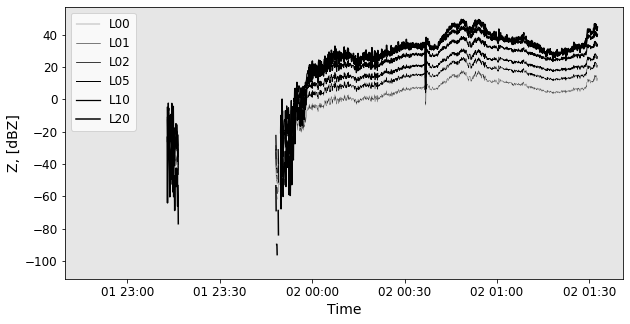

In [53]:
plt.figure(figsize=(10,5))
labels = ['L00','L01','L02','L05','L10','L20']
for i in np.arange(0,6):
  plt.plot(psd.time.values,Z.Z_x[:,i],'-k',lw=(i+1)/4,label=labels[i])

plt.legend()
plt.xlabel('Time')
plt.ylabel('Z, [dBZ]')